## Non-Profit Attrition Analysis

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline




**Load the data file **

In [2]:
attrition_base_data = pd.read_csv('Employee_Attrition.csv')

Look at the top 5 records of data

In [3]:
attrition_base_data.head()

,Unnamed: 0,EMPID,Leaver(Y/N),Age,Gender,Race_Ethnicity,Job_Level,Annual_Salary,Position,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Hybrid/Remote,Dept_Name,Status,Salary_Max%
0,0,A0ZU,No,35,Female,Unspecified,Administrative Support Workers,21,Benefits and Payroll Coordinator,11,1,0,Remote,HR,Full Time,0.00
1,1,A0YO,Yes,31,Female,Unspecified,First/Mid-Level Officials and Managers,21,Camp Director,7,1,46,Hybrid,Outdoor Education,Full Time,0.00
2,2,A03Y,Yes,63,Male,Black or African American,Laborers and Helpers,9547,Guest Services and Maintenance Specialist - PT,13,4,42,Hybrid,Risk and Facilities,Part Time,0.21
3,3,A13D,Yes,29,Female,White,Sales Workers,10400,Customer Service Representative - PT,13,2,22,Hybrid,Badge & Sash,Part Time,0.23
4,4,A1FN,Yes,33,Female,Black or African American,Sales Workers,10400,Customer Service Representative - PT,13,8,0,Remote,Badge & Sash,Part Time,0.23


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
attrition_base_data.shape

(364, 16)

In [5]:
attrition_base_data.columns.values

array(['Unnamed: 0', 'EMPID', 'Leaver(Y/N)', 'Age', 'Gender',
       'Race_Ethnicity', 'Job_Level', 'Annual_Salary', 'Position',
       'CurrentPayGrade', 'TimewithCompany(yrs)', 'DistancetoWork(miles)',
       'Hybrid/Remote', 'Dept_Name', 'Status', 'Salary_Max%'],
      dtype=object)

In [6]:
# Checking the data types of all the columns
attrition_base_data.dtypes

Unnamed: 0                 int64
EMPID                     object
Leaver(Y/N)               object
Age                        int64
Gender                    object
Race_Ethnicity            object
Job_Level                 object
Annual_Salary              int64
Position                  object
CurrentPayGrade            int64
TimewithCompany(yrs)       int64
DistancetoWork(miles)      int64
Hybrid/Remote             object
Dept_Name                 object
Status                    object
Salary_Max%              float64
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
attrition_base_data.describe()

,Unnamed: 0,Age,Annual_Salary,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Salary_Max%
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,181.500000,41.123626,44342.739011,9.104396,4.807692,34.750000,0.747280
std,105.221988,12.010720,21351.608204,3.208131,5.181695,166.452785,0.184501
min,0.000000,19.000000,21.000000,0.000000,0.000000,0.000000,0.000000
25%,90.750000,31.000000,33979.000000,7.000000,1.000000,0.000000,0.680000
50%,181.500000,39.500000,38472.000000,10.000000,3.000000,10.500000,0.740000
75%,272.250000,50.000000,51562.500000,12.000000,6.000000,21.250000,0.840000
max,363.000000,72.000000,145600.000000,13.000000,31.000000,2124.000000,1.330000


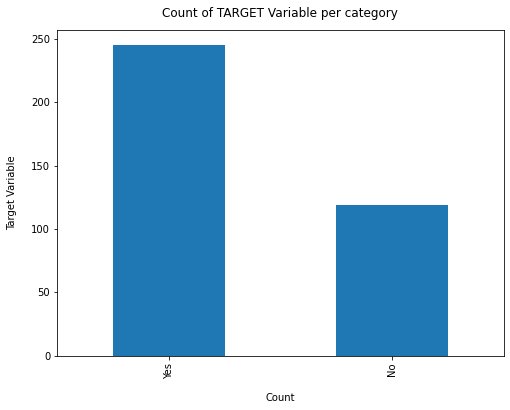

In [8]:
attrition_base_data['Leaver(Y/N)'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*attrition_base_data['Leaver(Y/N)'].value_counts()/len(attrition_base_data['Leaver(Y/N)'])

Yes    67.307692
No     32.692308
Name: Leaver(Y/N), dtype: float64

In [10]:
attrition_base_data['Leaver(Y/N)'].value_counts()

Yes    245
No     119
Name: Leaver(Y/N), dtype: int64

* Data is highly imbalanced, ratio = 67:33<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
attrition_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 16 columns):
Unnamed: 0               364 non-null int64
EMPID                    364 non-null object
Leaver(Y/N)              364 non-null object
Age                      364 non-null int64
Gender                   364 non-null object
Race_Ethnicity           364 non-null object
Job_Level                364 non-null object
Annual_Salary            364 non-null int64
Position                 364 non-null object
CurrentPayGrade          364 non-null int64
TimewithCompany(yrs)     364 non-null int64
DistancetoWork(miles)    364 non-null int64
Hybrid/Remote            364 non-null object
Dept_Name                364 non-null object
Status                   364 non-null object
Salary_Max%              364 non-null float64
dtypes: float64(1), int64(6), object(9)
memory usage: 45.6+ KB


/Users/azmirsuljic/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


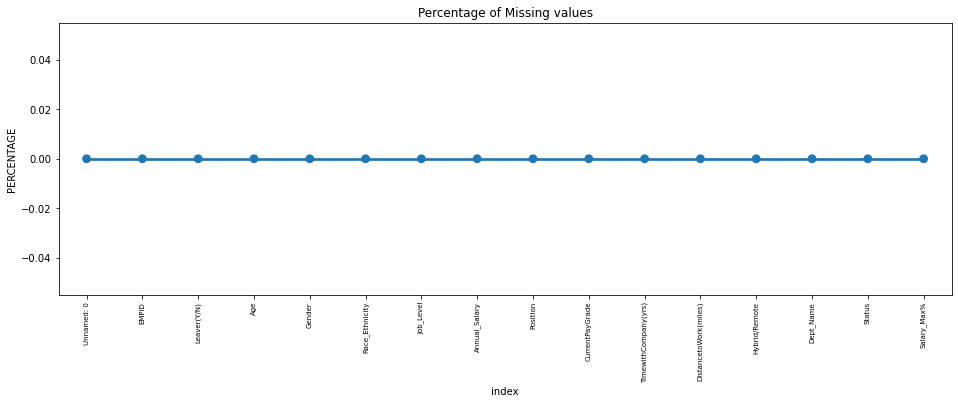

In [12]:
missing = pd.DataFrame((attrition_base_data.isnull().sum())*100/attrition_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [13]:
attrition_data = attrition_base_data.copy()

**6.** Remove columns not required for processing

In [14]:
#drop column customerID and tenure
attrition_data.drop(columns= ['Unnamed: 0','EMPID','Status','Race_Ethnicity','Job_Level','Position','Hybrid/Remote','Salary_Max%'], axis=1, inplace=True)
attrition_data.head()

,Leaver(Y/N),Age,Gender,Annual_Salary,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Dept_Name
0,No,35,Female,21,11,1,0,HR
1,Yes,31,Female,21,7,1,46,Outdoor Education
2,Yes,63,Male,9547,13,4,42,Risk and Facilities
3,Yes,29,Female,10400,13,2,22,Badge & Sash
4,Yes,33,Female,10400,13,8,0,Badge & Sash


## Data Exploration
**1. ** Plot distibution of individual predictors by attrition

### Univariate Analysis

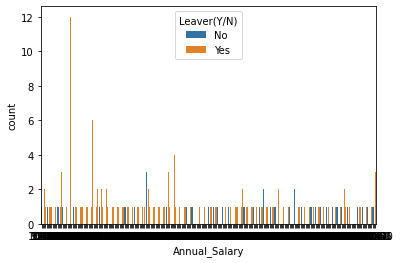

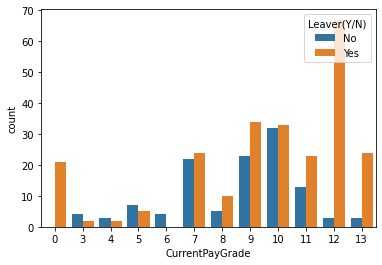

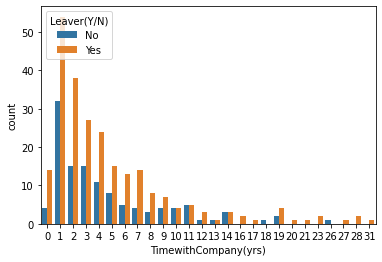

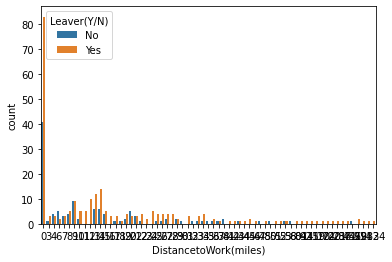

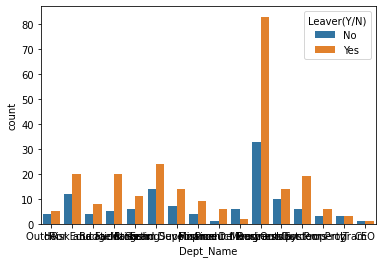

In [15]:
for i, predictor in enumerate(attrition_data.drop(columns=['Leaver(Y/N)', 'Gender','Age'])):
    plt.figure(i)
    sns.countplot(data=attrition_data, x=predictor, hue='Leaver(Y/N)')

**2.** Convert the target variable 'Leaver(Y/N)'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [16]:
# attrition_data['Leaver(Y/N)'] = np.where(attrition_data.Leaver(Y/N) == 'Yes',1,0)

In [17]:
attrition_data["Leaver(Y/N)"].replace({"Yes": 1, "No": 0}, inplace=True)

In [18]:
attrition_data.head()

,Leaver(Y/N),Age,Gender,Annual_Salary,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Dept_Name
0,0,35,Female,21,11,1,0,HR
1,1,31,Female,21,7,1,46,Outdoor Education
2,1,63,Male,9547,13,4,42,Risk and Facilities
3,1,29,Female,10400,13,2,22,Badge & Sash
4,1,33,Female,10400,13,8,0,Badge & Sash


**3.** Convert all the categorical variables into dummy variables

In [19]:
attrition_data_dummies = pd.get_dummies(attrition_data)
attrition_data_dummies.head()

,Leaver(Y/N),Age,Annual_Salary,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Gender_ Female,Gender_ Male,Gender_Female,Dept_Name_Badge & Sash,...,Dept_Name_IT,Dept_Name_Marketing,Dept_Name_Membership,Dept_Name_Mission Delivery,Dept_Name_Outdoor Education,Dept_Name_Outdoor Program,Dept_Name_Outdoor Property,Dept_Name_Product Programs,Dept_Name_Program Support,Dept_Name_Risk and Facilities
0,0,35,21,11,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,31,21,7,1,46,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,63,9547,13,4,42,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,29,10400,13,2,22,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,33,10400,13,8,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**9. ** Relationship between TimewithCompany(yrs)and Salary

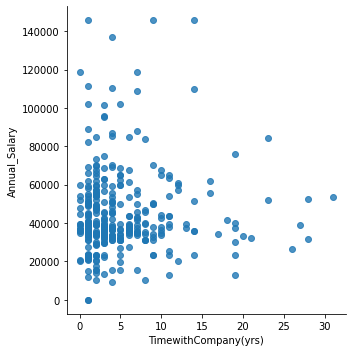

In [26]:
sns.lmplot(data=attrition_data_dummies, x='TimewithCompany(yrs)', y='Annual_Salary', fit_reg=False)

Text(0.5, 1.0, 'Annual Salary by Attrition')

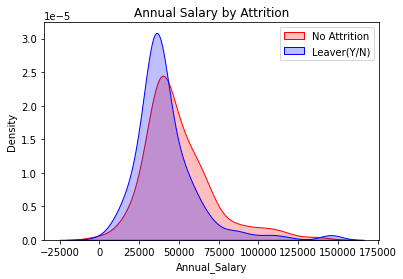

In [28]:
Mth = sns.kdeplot(attrition_data_dummies.Annual_Salary[(attrition_data_dummies["Leaver(Y/N)"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(attrition_data_dummies.Annual_Salary[(attrition_data_dummies["Leaver(Y/N)"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Attrition","Leaver(Y/N)"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Annual_Salary')
Mth.set_title('Annual Salary by Attrition')

**11. Build a corelation of all predictors with Leaver(Y/N)' **

<AxesSubplot:>

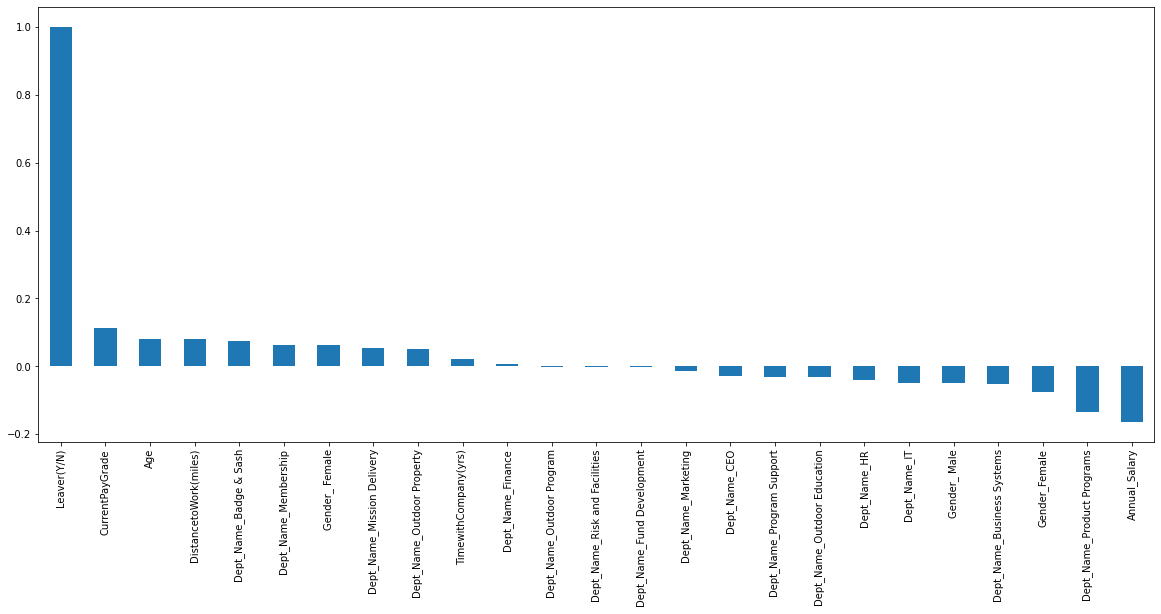

In [33]:
plt.figure(figsize=(20,8))
attrition_data_dummies.corr()['Leaver(Y/N)'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

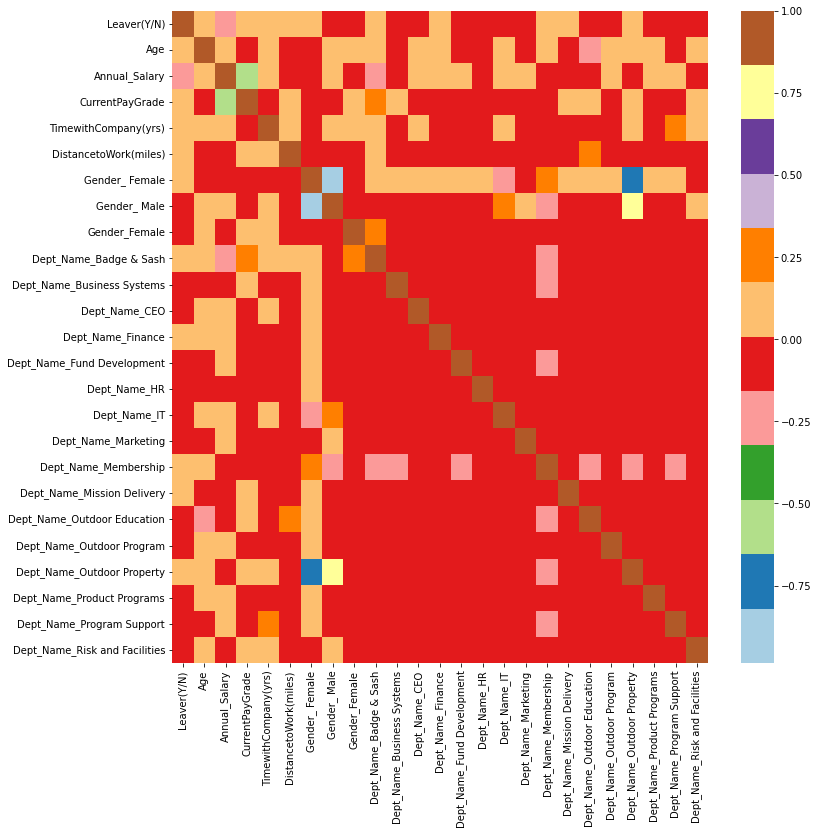

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(attrition_data_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [35]:
new_df1_target0=attrition_data.loc[attrition_data["Leaver(Y/N)"]==0]
new_df1_target1=attrition_data.loc[attrition_data["Leaver(Y/N)"]==1]

In [36]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [37]:
attrition_data_dummies.to_csv('atr_emp.csv')